In [1]:
# 블록 지정 & alt + shift + e
# 주피터 노트북에서 하나의 코드 블록을 실행시킨 효과

import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding="UTF-8") as file:
            data["review"].append(file.read())

    return pd.DataFrame.from_dict(data)


def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df, neg_df])


train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [2]:
train_df.head()

reviews = list(train_df['review'])

tokenized_reviews = [r.split() for r in reviews]

review_len_by_token = [len(t) for t in tokenized_reviews]

review_len_by_enumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

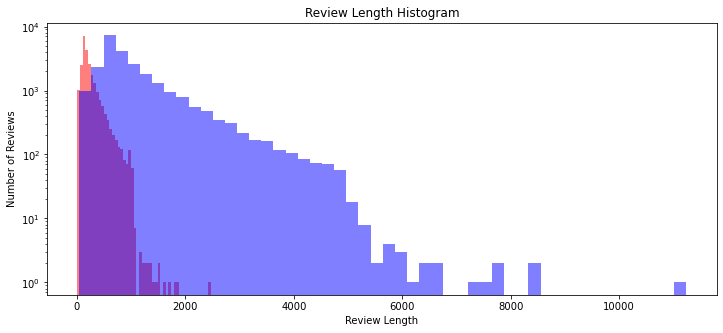

In [3]:
# 히스토그램
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_enumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')

plt.xlabel('Review Length')

plt.ylabel('Number of Reviews')

In [4]:
# 데이터 분포 출력
import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d52ae1df08>,
 'caps': [<matplotlib.lines.Line2D at 0x1d52aec8a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d52af37848>],
 'medians': [<matplotlib.lines.Line2D at 0x1d52af2f508>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d52af2fb48>],
 'means': [<matplotlib.lines.Line2D at 0x1d52af2f2c8>]}

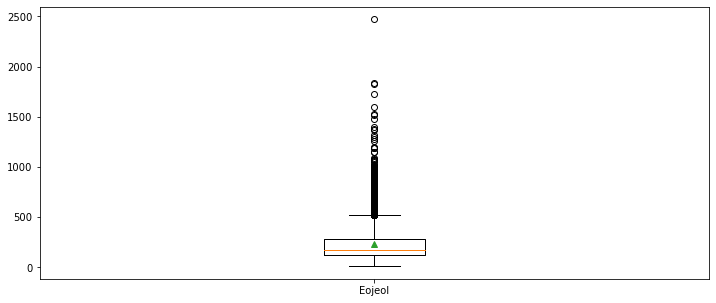

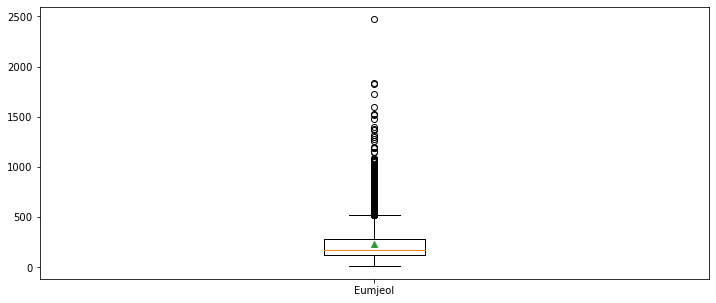

In [5]:
# 박스 플롯
plt.figure(figsize=(12, 5))

plt.boxplot([review_len_by_token],
            labels=['Eojeol'],
            showmeans=True)


plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_token],
            labels=['Eumjeol'],
            showmeans=True)

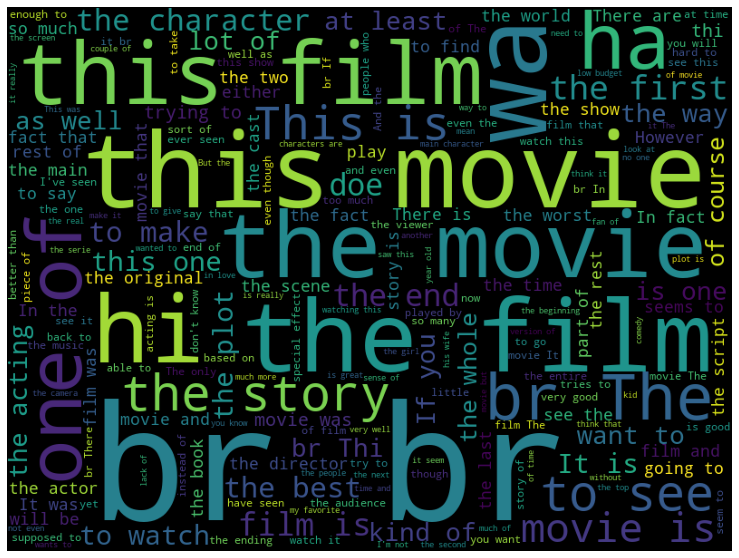

In [6]:
# 워드 클라우드
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 옛날 주피터 노트북 명령어. 코드 밑에 그래프를 그려줘!
# 지금 버전에서는 안씀
# %matplotlib inline

wordCloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800,
                      height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

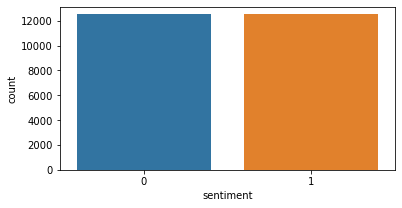

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])